## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [36]:
cols = ['Date', 'Tag', "Posts"]
df = pd.read_csv('QueryResults.csv', names=cols, header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [37]:
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [38]:
df.tail()

,Date,Tag,Posts
2070,2021-01-01 00:00:00,php,6707
2071,2021-01-01 00:00:00,ruby,623
2072,2021-01-01 00:00:00,go,697
2073,2021-01-01 00:00:00,perl,150
2074,2021-01-01 00:00:00,swift,2997


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [39]:
df.shape

(2075, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [40]:
df.count()

Date     2075
Tag      2075
Posts    2075
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [41]:
df.groupby(["Tag"]).sum()

,Posts
Tag,
assembly,36784
c,350435
c#,1459963
c++,710220
delphi,47332
go,51287
java,1747990
javascript,2160024
perl,65493


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [42]:
df.groupby(['Tag']).count()

,Date,Posts
Tag,,
assembly,150,150
c,150,150
c#,151,151
c++,150,150
delphi,150,150
go,135,135
java,150,150
javascript,150,150
perl,150,150


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [48]:
df['Date'][1]

'2008-08-01 00:00:00'

In [56]:
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [66]:
reshaped_df = df.pivot('Date', 'Tag', 'Posts')


Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1649.0,754.0,105.0,NaN,1136.0,640.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,725.0,127.0,616.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1732.0,735.0,141.0,NaN,958.0,580.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,308.0,2294.0,7315.0,4250.0,182.0,813.0,10797.0,19596.0,167.0,5676.0,25192.0,5382.0,573.0,3028.0
2020-10-01,389.0,2532.0,7069.0,4769.0,194.0,649.0,10852.0,19259.0,175.0,5497.0,26606.0,5796.0,552.0,2770.0
2020-11-01,415.0,2916.0,6865.0,4794.0,211.0,603.0,10385.0,18310.0,152.0,5600.0,26181.0,5621.0,588.0,2636.0


In [67]:
reshaped_df.tail()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2020-09-01,308.0,2294.0,7315.0,4250.0,182.0,813.0,10797.0,19596.0,167.0,5676.0,25192.0,5382.0,573.0,3028.0
2020-10-01,389.0,2532.0,7069.0,4769.0,194.0,649.0,10852.0,19259.0,175.0,5497.0,26606.0,5796.0,552.0,2770.0
2020-11-01,415.0,2916.0,6865.0,4794.0,211.0,603.0,10385.0,18310.0,152.0,5600.0,26181.0,5621.0,588.0,2636.0
2020-12-01,319.0,2811.0,6594.0,4908.0,213.0,583.0,9489.0,18778.0,131.0,5658.0,25896.0,4980.0,561.0,2476.0
2021-01-01,371.0,3003.0,7938.0,5034.0,214.0,697.0,10619.0,21312.0,150.0,6707.0,28836.0,5243.0,623.0,2997.0


In [69]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [71]:
reshaped_df.count()

Tag
assembly      150
c             150
c#            151
c++           150
delphi        150
go            135
java          150
javascript    150
perl          150
php           150
python        150
r             148
ruby          150
swift         141
dtype: int64

In [74]:
reshaped_df.fillna(value=0, inplace=True )
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1649.0,754.0,105.0,0.0,1136.0,640.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,725.0,127.0,616.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,735.0,141.0,0.0,958.0,580.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,308.0,2294.0,7315.0,4250.0,182.0,813.0,10797.0,19596.0,167.0,5676.0,25192.0,5382.0,573.0,3028.0
2020-10-01,389.0,2532.0,7069.0,4769.0,194.0,649.0,10852.0,19259.0,175.0,5497.0,26606.0,5796.0,552.0,2770.0
2020-11-01,415.0,2916.0,6865.0,4794.0,211.0,603.0,10385.0,18310.0,152.0,5600.0,26181.0,5621.0,588.0,2636.0


In [78]:
reshaped_df.isna().values.any()

False

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [93]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [94]:
reshaped_df.shape

(151, 14)

In [95]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1649.0,754.0,105.0,0.0,1136.0,640.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,725.0,127.0,616.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,735.0,141.0,0.0,958.0,580.0,97.0,504.0,452.0,1.0,160.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib



**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

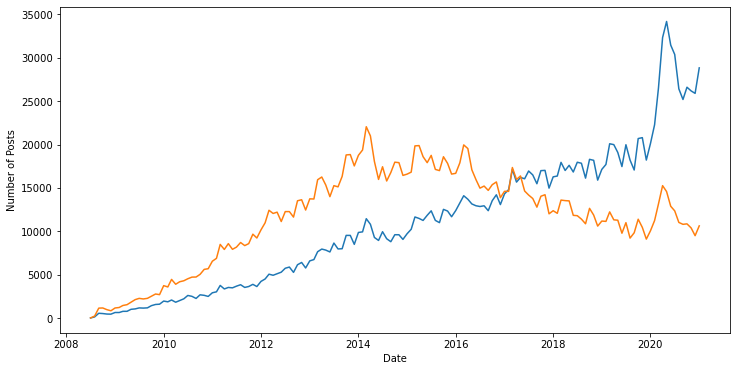

In [114]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Posts', fontsize=10)

plt.plot(reshaped_df.index, reshaped_df.python)
plt.plot(reshaped_df.index, reshaped_df.java)

plt.show()

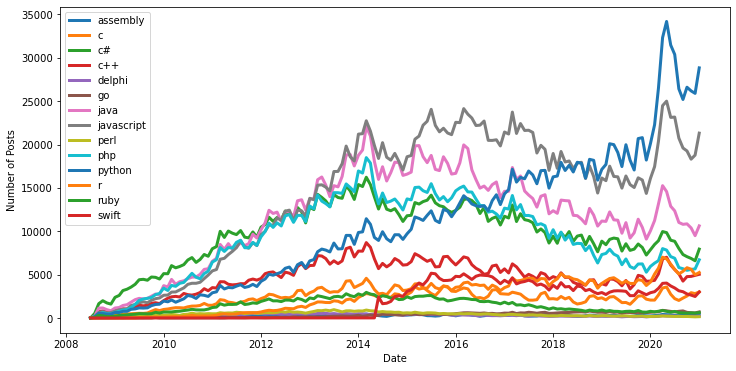

In [126]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Posts', fontsize=10)

for i in reshaped_df:
    plt.plot(reshaped_df.index, reshaped_df[i], linewidth=3, label=reshaped_df[i].name)

plt.legend()
plt.show()


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [139]:
roll_df = reshaped_df.rolling(window=3).mean()

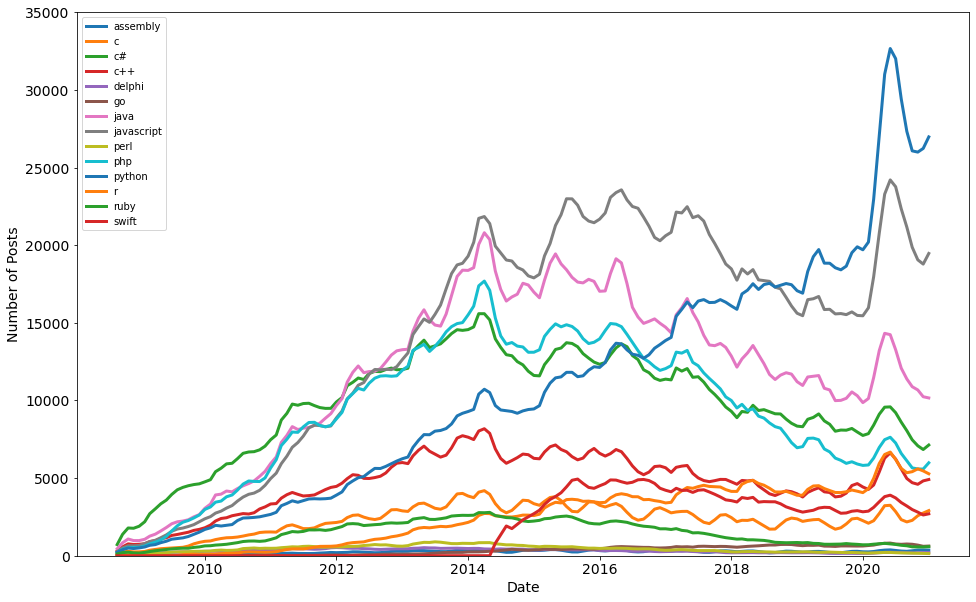

In [140]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend()    
plt.show()